<a href="https://colab.research.google.com/github/matsmoraes/Simula-o_Probabilista/blob/main/uniforme_circ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

n = 2000 # quantidade de pontos a serem gerados

# gerando duas variáveris uniformes no intervalo de 0 a 1
u = np.random.rand(n)
v = np.random.rand(n)

r = np.sqrt(u) # a transformção demonstrada matematicamente Raio = Raiz(Unif)
theta = 2 * np.pi * v # theta continua sendo uma uniforme de 0 a 2pi

df = pd.DataFrame({
    'r': r,
    'theta': theta,
    'x': r * np.cos(theta),
    'y': r * np.sin(theta),
    'u': u,
    'v': v
})

# E vamos salvar as duas formas de geração de pontos
print("Salvando pontos_corretos.png...")
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], s=1)
plt.axis('equal')
plt.axis('off')
plt.savefig("pontos_corretos.png", bbox_inches='tight', dpi=300)
plt.close()

print("Salvando pontos_incorretos.png...")
x_incorreto = df['u'] * np.cos(2 * np.pi * df['v'])
y_incorreto = df['u'] * np.sin(2 * np.pi * df['v'])
plt.figure(figsize=(6, 6))
plt.scatter(x_incorreto, y_incorreto, s=1)
plt.axis('equal')
plt.axis('off')
plt.savefig("pontos_incorretos.png", bbox_inches='tight', dpi=300)
plt.close()

Para visualizar melhor a diferença, vamos colorir pontos por faixa de u e visualizar o mapeamento desses pontos:

Mostrando gráfico 'u vs v'...


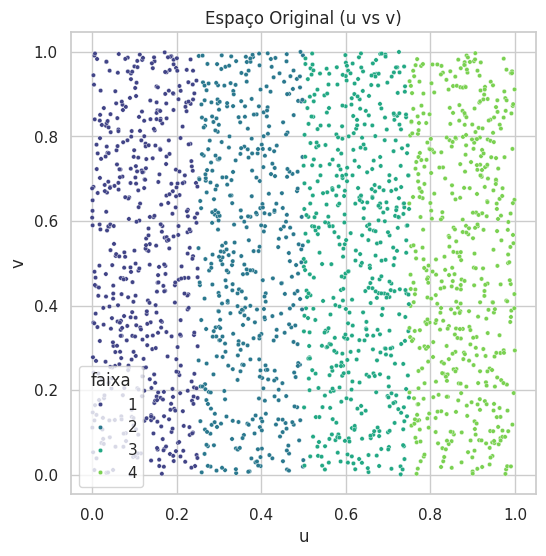

In [ ]:
bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = [1, 2, 3, 4]

df['faixa'] = pd.cut(df['u'], bins=bins, labels=labels, right=True, include_lowest=True)

print("Mostrando gráfico 'u vs v'...")
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='u', y='v', hue='faixa', palette='viridis', s=10)
plt.axis('equal')
plt.title("Espaço Original (u vs v)")
plt.show()
plt.close()

Agora comparando a geração de pontos pelas duas transformações: Raio = √Uniforme e Raio = Uniforme.

Perceba que gerar valores de raio entre 0 e 1 de usando uma uniforme direta, os pontos ficam concentrados no centro do círculo, e a densidade de pontos decresce conforme se afasta do raio. Isso se deve pois, como essa probabilidade de pontos no círculo é uma "densidade de pontos" sobre o círculo, i.e, quantidade de pontos por área, e a área do círculo cresce com o quadrado do Raio (pi*R²).

A transformação R = √Unif corrige isso e força a geração de pontos no círculo.

Mostrando comparação lado a lado...


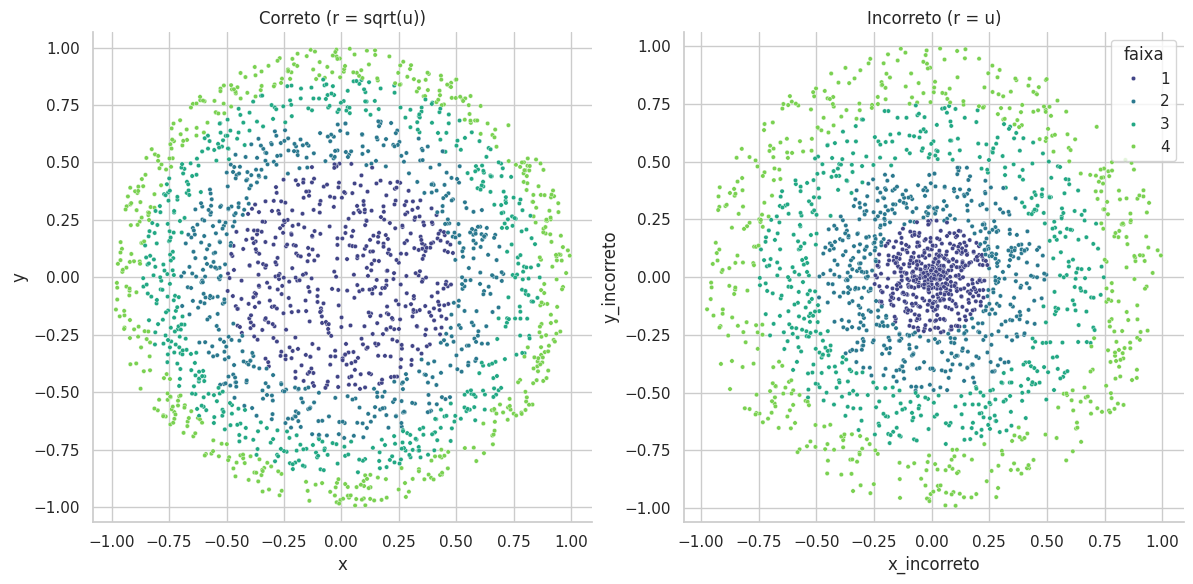

In [ ]:
print("Mostrando comparação lado a lado...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df['x_incorreto'] = x_incorreto
df['y_incorreto'] = y_incorreto

# Gráfico 1: Correto (p1)
sns.scatterplot(data=df, x='x', y='y', hue='faixa', palette='viridis', s=10, legend=False, ax=ax1)
ax1.set_title("Correto (r = sqrt(u))")
ax1.axis('equal')
sns.despine(ax=ax1)

# Gráfico 2: Incorreto (p2)
sns.scatterplot(data=df, x='x_incorreto', y='y_incorreto', hue='faixa', palette='viridis', s=10, legend=True, ax=ax2)
ax2.set_title("Incorreto (r = u)")
ax2.axis('equal')
sns.despine(ax=ax2)

plt.tight_layout()
plt.show()
plt.close()

Criando uma Função que gere pontos uniformemente no disco

Gerando e plotando 5000 pontos uniformes...


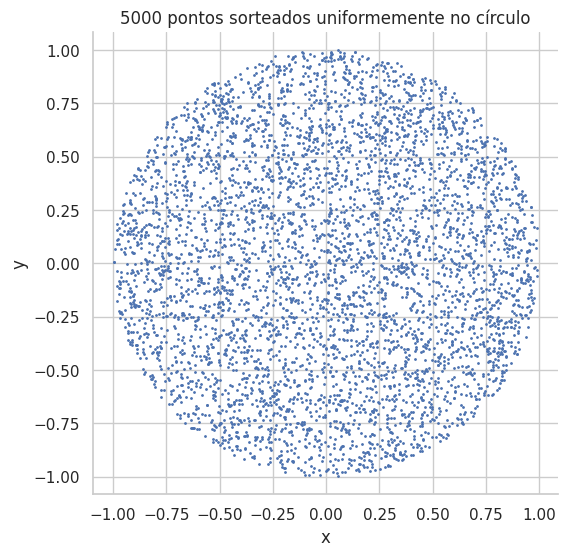

In [ ]:
def sorteia_uniforme(n_points):
    """
    Sorteia n_points uniformemente dentro do círculo unitário e plota o resultado.
    """
    print(f"Gerando e plotando {n_points} pontos uniformes...")
    u = np.random.rand(n_points)
    v = np.random.rand(n_points)

    r = np.sqrt(u)
    theta = 2 * np.pi * v

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=1)
    plt.axis('equal')
    sns.despine()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"{n_points} pontos sorteados uniformemente no círculo")
    plt.show()
    plt.close()

sorteia_uniforme(5000)

Perceba que é um algorítimo mais otimizado e mais simples da forma "padrão" que geramos pontos no círculo: construir um quadrado e um círculo dentro dele, gerar pontos do quadrado e selecionar os pontos que estão dentro círculo.

Agora geramos direto pontos do círculo e precisamos de bem menos passos no código. Além disso, como destrinchamos matematicamente como gerar pontos em coordenadas polares basicamente e descobrimos como forçar que os pontos sejam uniformes. É possível gerar generalizar esse conceito para outras formas e outras dimensões, como em coordenadas esféricas ou cilíndricas, basta saber os fundamentos de transformações lineares em probabilidade.

E claro, é possível usar Monte Carlo para estimar parâmetros desconhecidos nessas outras dimensões e formas, como estimar pi nesse exemplo.